In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('earthquakes.csv')

Evolution over time
Line plots help us see how a variable changes over time. They are the default for the kind argument, but we can pass kind='line' to be explicit in our intent:

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

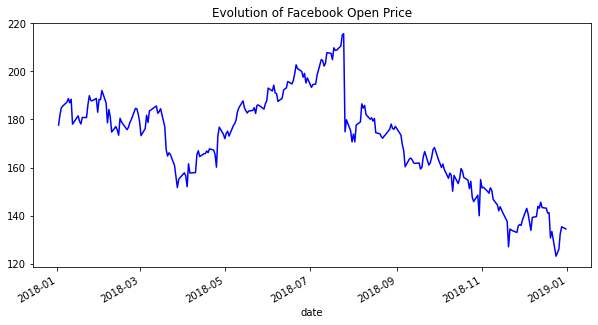

In [2]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    style='b-',
    legend=False,
    title='Evolution of Facebook Open Price'
)

We provided the style argument in the previous example; however, we can use the color and linestyle arguments to get the same result:

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

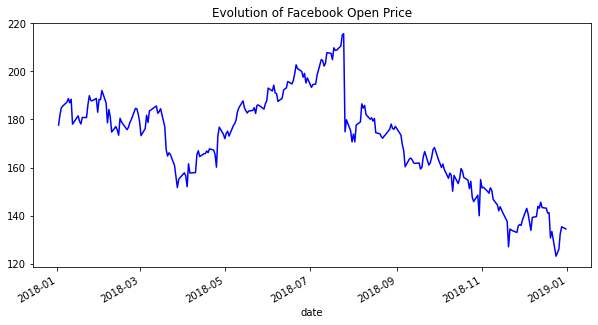

In [3]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    color='blue',
    linestyle='solid',
    legend=False,
    title='Evolution of Facebook Open Price'
)

We can also plot many lines at once by simply passing a list of the columns to plot:

<Axes: title={'center': 'Facebook OHLC Prices during 1st Week of Trading 2018'}, xlabel='date'>

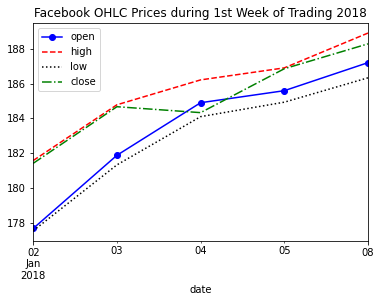

In [4]:
fb.iloc[:5,].plot(
    y=['open', 'high', 'low', 'close'],
    style=['b-o', 'r--', 'k:', 'g-.'],
    title='Facebook OHLC Prices during 1st Week of Trading 2018'
)

Creating subplots
When plotting with pandas, creating subplots is simply a matter of passing subplots=True to the plot() method, and (optionally) specifying the layout in a tuple of (rows, columns):

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

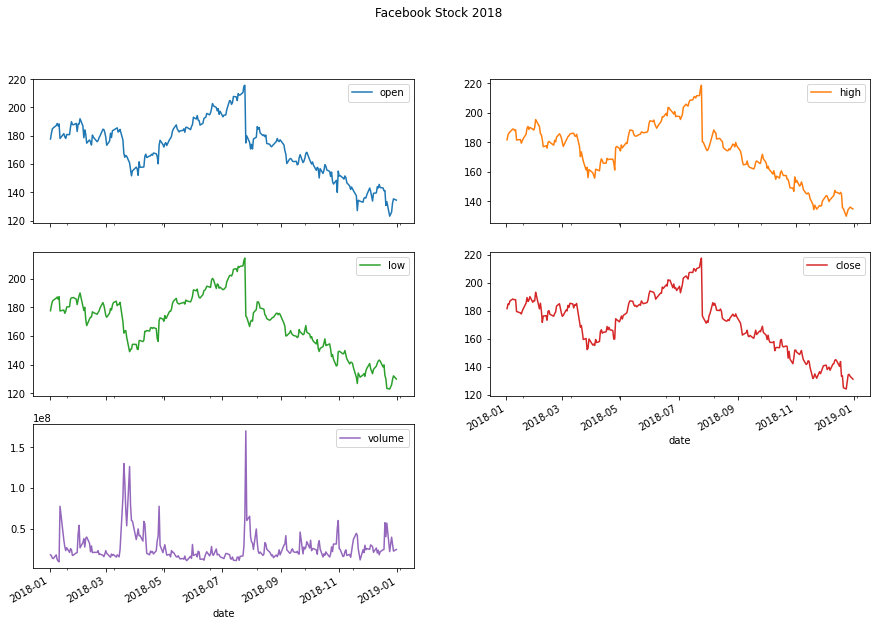

In [5]:
fb.plot(
    kind='line',
    subplots=True,
    layout=(3,2),
    figsize=(15,10),
    title='Facebook Stock 2018'
)

Visualizing relationships between variables
Scatter plots
We make scatter plots to help visualize the relationship between two variables. Creating scatter plots requires we pass in kind='scatter' along with a column for the x-axis and a column for the y-axis:

<Axes: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

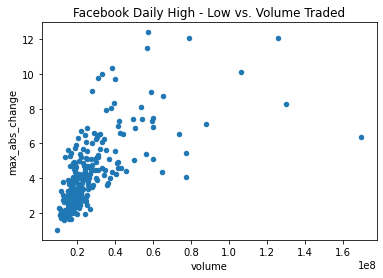

In [6]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. Volume Traded'
)

The relationship doesn't seem to be linear, but we can try a log transform on the x-axis since the scales of the axes are very different. With pandas, we simply pass in logx=True:
-------With matplotlib, we could use plt.xscale('log') to do the same thing---------

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

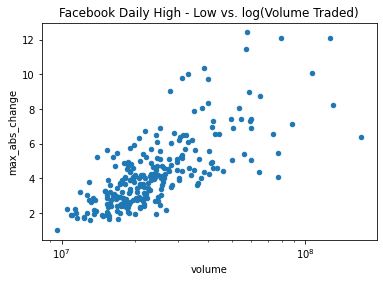

In [7]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)', 
    logx=True
)

Adding Transparency to Plots with alpha
Sometimes our plots have many overlapping values, but this can be impossible to see. This can be addressed by increasing the transparency of what we are plotting using the alpha parameter. It is a float on [0, 1] where 0 is completely transparent and 1 is completely opaque. By default this is 1, so let's put in a lower value and re-plot the scatter plot:

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

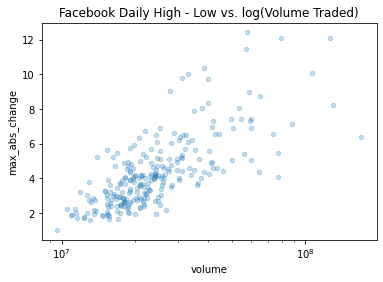

In [8]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    logx=True, alpha=0.25
)

Hexbins
In the previous example, we can start to see the overlaps, but it is still difficult. Hexbins are another plot type that divide up the plot into hexagons, which are shaded according to the density of points there. With pandas, this is the hexbin value for the kind argument. It can also be important to tweak the gridsize, which determines the number of hexagons along the y-axis:

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='log_volume', ylabel='max_abs_change'>

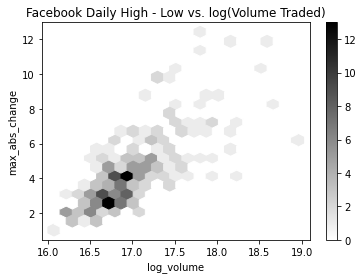

In [9]:
fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).plot(
    kind='hexbin',
    x='log_volume',
    y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    colormap='gray_r',
    gridsize=20, 
    sharex=False # we have to pass this to see the x-axis due to a bug in this version of pandas
)

Visualizing distributions
Histograms
With the pandas plot() method, making histograms is as easy as passing in kind='hist':

Text(0.5, 0, 'Volume traded')

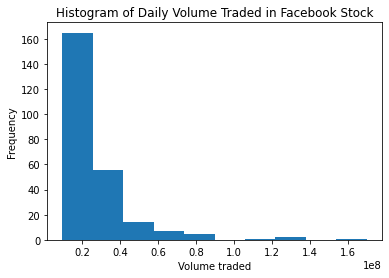

In [10]:
fb.volume.plot(
    kind='hist', 
    title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded') # label the x-axis (discussed in chapter 6)

We can overlap histograms to compare distributions provided we use the alpha parameter. For example, let's compare the usage and magnitude of the various magTypes in the data:

Text(0.5, 0, 'magnitude')

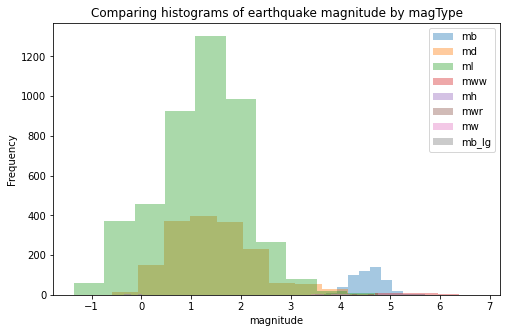

In [11]:
fig, axes = plt.subplots(figsize=(8, 5))
for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(
            kind='hist', ax=axes, alpha=0.4, 
            label=magtype, legend=True,
            title='Comparing histograms of earthquake magnitude by magType'
        )
plt.xlabel('magnitude') # label the x-axis (discussed in chapter 6)

Kernel Density Estimation (KDE)
We can pass kind='kde' for a probability density function (PDF), which tells us the probability of getting a particular value:

Text(0.5, 0, 'Price ($)')

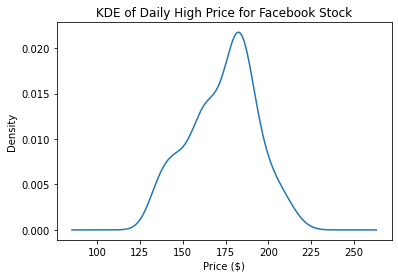

In [12]:
fb.high.plot(
    kind='kde', 
    title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

Adding to the result of plot()
The plot() method returns a matplotlib Axes object. We can store this for additional customization of the plot, or we can pass this into another call to plot() as the ax argument to add to the original plot.

It can often be helpful to view the KDE superimposed on top of the histogram, which can be achieved with this strategy:

Text(0.5, 0, 'Price ($)')

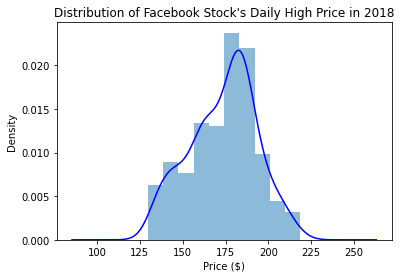

In [13]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
    ax=ax, kind='kde', color='blue', 
    title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

Plotting the ECDF
In some cases, we are more interested in the probability of getting less than or equal to that value (or greater than or equal), which we can see with the cumulative disribution function (CDF). Using the statsmodels package, we can estimate the CDF giving us the empirical cumulative distribution function (ECDF):

In [14]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'ECDF of earthquake magnitude with magType ml')

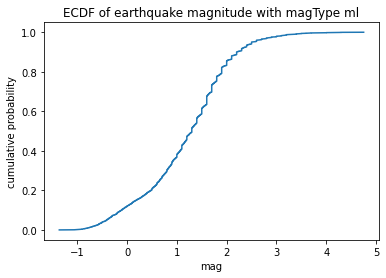

In [15]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# axis labels (we will cover this in chapter 6)
plt.xlabel('mag') # add x-axis label 
plt.ylabel('cumulative probability') # add y-axis label

# add title (we will cover this in chapter 6)
plt.title('ECDF of earthquake magnitude with magType ml')

This ECDF tells us the probability of getting an earthquake with magnitude of 3 or less using the ml scale is 98%:

Text(0.5, 1.0, 'P(mag <= 3) = 98%')

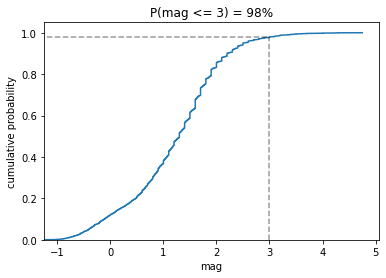

In [16]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# formatting below will all be covered in chapter 6
# axis labels
plt.xlabel('mag') # add x-axis label 
plt.ylabel('cumulative probability') # add y-axis label

# add reference lines for interpreting the ECDF for mag <= 3 
plt.plot(
    [3, 3], [0, .98], 'k--', 
    [-1.5, 3], [0.98, 0.98], 'k--', alpha=0.4
)

# set axis ranges
plt.ylim(0, None)
plt.xlim(-1.25, None)

# add a title
plt.title('P(mag <= 3) = 98%')

we can Groupby()Box plots:

/tmp/ipykernel_2060/2255955200.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ).groupby('volume_bin').boxplot(


Text(0.5, 1.1, 'Facebook OHLC Boxplots by Volume Traded')

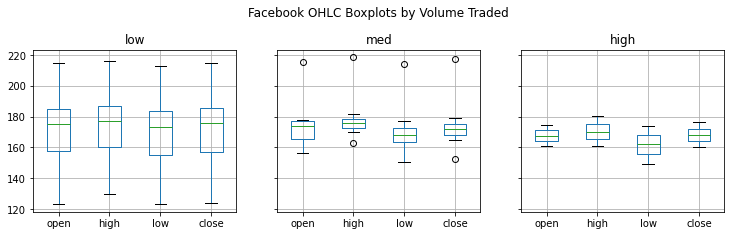

In [17]:
fb.assign(
    volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])
).groupby('volume_bin').boxplot(
    column=['open', 'high', 'low', 'close'],
    layout=(1, 3), figsize=(12, 3)
)
plt.suptitle('Facebook OHLC Boxplots by Volume Traded', y=1.1)

We can use this to see the distribution of magnitudes across the different measurement methods for earthquakes:

Text(0, 0.5, 'magnitude')

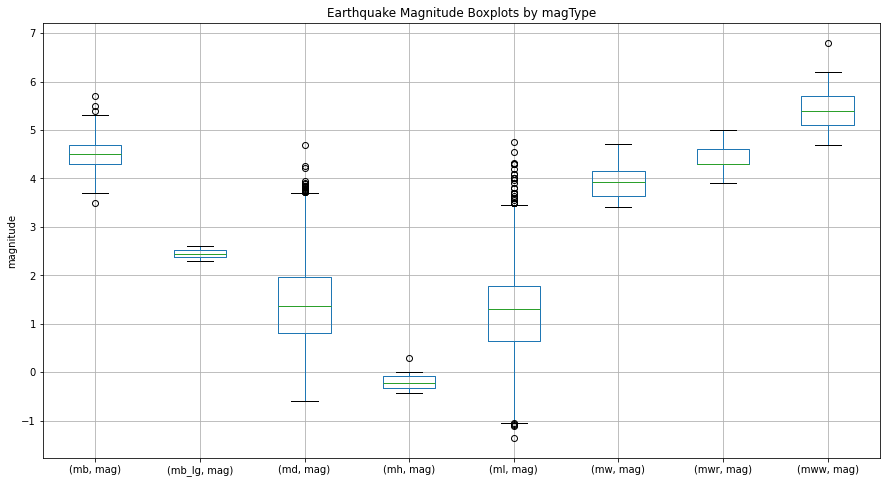

In [18]:
quakes[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Boxplots by magType')
plt.ylabel('magnitude') # label the y-axis (discussed in chapter 6)

Counts and frequencies
Bar charts

Text(0, 0.5, 'volume')

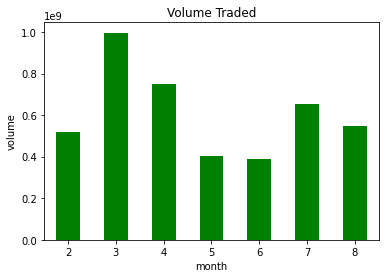

In [19]:
fb['2018-02':'2018-08'].assign(
    month=lambda x: x.index.month
).groupby('month').sum().volume.plot.bar(
    color='green', rot=0, title='Volume Traded'
)
plt.ylabel('volume')

We can also change the orientation of the bars. Passing kind='barh' gives us horizontal bars instead of vertical ones. Let's use this to look at the top 15 places for earthquakes in our data:

Text(0.5, 0, 'earthquakes')

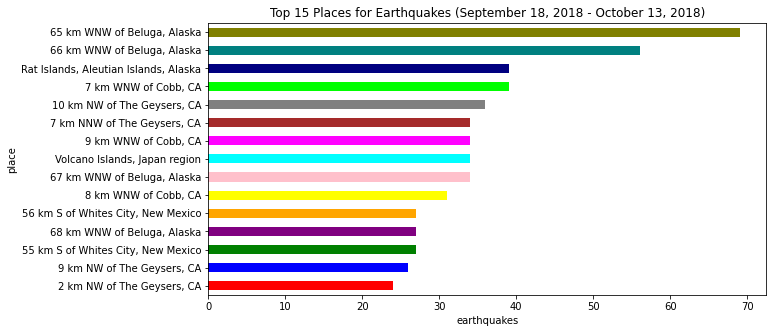

In [20]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'pink', 'cyan', 'magenta', 'brown', 'grey', 'lime', 'navy', 'teal', 'olive']
quakes.place.value_counts().iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 15 Places for Earthquakes '\
        '(September 18, 2018 - October 13, 2018)', color=colors
)
plt.xlabel('earthquakes')

We also have data on whether earthquakes were accompanied by tsunamis. Let's see what the top places for tsunamis are:

Text(0.5, 0, 'tsunamis')

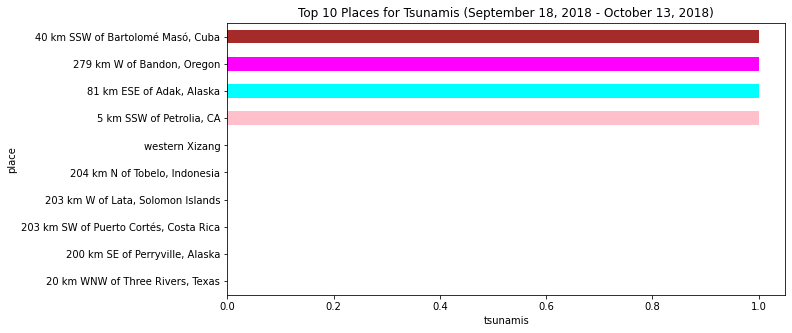

In [21]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'pink', 'cyan', 'magenta', 'brown', 'grey', 'lime', 'navy', 'teal', 'olive']
quakes.groupby('place').tsunami.sum().sort_values().iloc[-10::,].plot(
    kind='barh', figsize=(10, 5), 
    title='Top 10 Places for Tsunamis '\
        '(September 18, 2018 - October 13, 2018)', color=colors
)
plt.xlabel('tsunamis')

Using the kind arugment for vertical bars when the labels for each bar are shorter:

Text(0, 0.5, 'earthquakes')

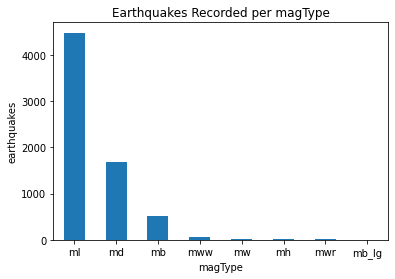

In [22]:
quakes.magType.value_counts().plot(
    kind='bar', title='Earthquakes Recorded per magType', rot=0
)

# label the axes (discussed in chapter 6)
plt.xlabel('magType')
plt.ylabel('earthquakes')

Top 4 places with earthquakes:

In [23]:
indonesia_quakes = quakes.query('place == "Cuba"')
print(indonesia_quakes)

Empty DataFrame
Columns: [mag, place, time, updated, tz, url, detail, felt, cdi, mmi, alert, status, tsunami, sig, net, code, ids, sources, types, nst, dmin, rms, gap, magType, type, title]
Index: []

[0 rows x 26 columns]


Stacked bar chart

Text(0, 0.5, 'earthquakes')

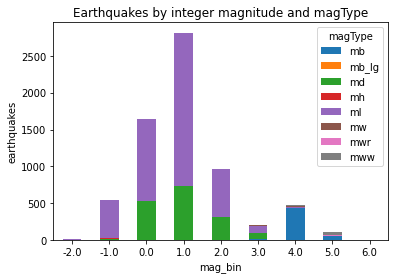

In [24]:
pivot = quakes.assign(
    mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
    index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
    stacked=True, rot=0, 
    title='Earthquakes by integer magnitude and magType'
)
plt.ylabel('earthquakes')

Normalized stacked bars
Plot the percentages to be better able to see the different magTypes.

Text(0, 0.5, 'percentage')

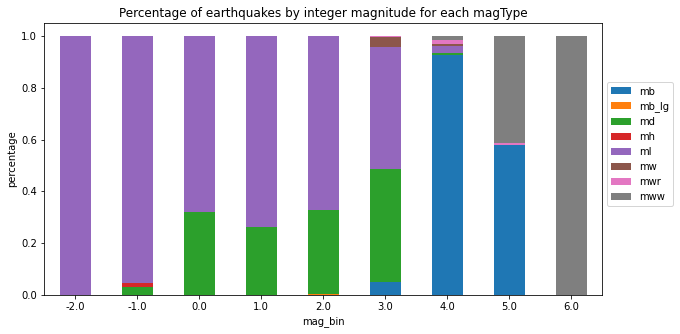

In [25]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x/x.sum(), axis=1)
ax = normalized_pivot.plot.bar(
    stacked=True, rot=0, figsize=(10, 5),
    title='Percentage of earthquakes by integer magnitude for each magType'
)
ax.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of the plot
plt.ylabel('percentage') 